In [114]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype as is_num
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
#Importing the CSV file using Pandas

house_rent_df = pd.read_csv("House_Rent_Dataset.csv", delimiter = ',', header = 'infer')
house_rent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,5/18/2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,5/15/2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,7/10/2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,7/6/2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [116]:
house_rent_df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [117]:
# Total no of null values for each col

house_rent_df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [118]:
# A function to show statistical info about every column

def show_stats(df):
    
    stats = pd.DataFrame(columns = ['Count', 'Dtype', 'Unique', 'Numeric', 'min', '25%', 'median', 'mode', 'mean', '75%', 'max', 'skew', 'kurt', 'std'])
    
    for col in df:
        
        count = df[col].count()                 # no. of entries for each feature
        dtype = df[col].dtype                   # data type 
        nunique = df[col].nunique()             # no. of unique values
        num = is_num(df[col])
        
        
        # For numeric cols calculate min, max, mean, median,...
        if is_num(df[col]):
            
            # Calculating mathematical statistics for numeric columns of datset
            min_val = df[col].min()
            max_val = df[col].max()
            first_q = df[col].quantile(0.25)   # first quartile
            median = df[col].median()
            mode = df[col].mode().values[0]
            mean = df[col].mean()
            third_q = df[col].quantile(0.75)   # third quartile
            skewness = df[col].skew()
            kurt = kurtosis(df[col])
            std = df[col].std()
            
            #inserting rows into the output dataframe
            stats.loc[col] = [count, dtype, nunique,num, min_val, first_q , median, mode, 
                              mean, third_q, max_val, skewness, kurt, std]
        
        # For non-numeric cols, show total count, no. of unique values
        else:
            stats.loc[col] = [count, dtype, nunique,num, '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
    
    return stats.sort_values(by = ['Numeric', 'skew', 'Unique'], ascending = False)


In [119]:
# Statistical information for cols in the house rent dataset

show_stats(house_rent_df)

,Count,Dtype,Unique,Numeric,min,25%,median,mode,mean,75%,max,skew,kurt,std
Rent,4746,int64,243,True,1200,10000.0,16000.0,15000,34993.451327,33000.0,3500000,21.409942,840.220941,78106.412937
Size,4746,int64,615,True,10,550.0,850.0,1000,967.490729,1200.0,8000,2.299892,11.015201,634.202328
Bathroom,4746,int64,8,True,1,1.0,2.0,2,1.965866,2.0,10,1.272951,3.600022,0.884532
BHK,4746,int64,6,True,1,2.0,2.0,2,2.08386,3.0,6,0.599216,0.597327,0.832256
Area Locality,4746,object,2235,False,-,-,-,-,-,-,-,-,-,-
Floor,4746,object,480,False,-,-,-,-,-,-,-,-,-,-
Posted On,4746,object,81,False,-,-,-,-,-,-,-,-,-,-
City,4746,object,6,False,-,-,-,-,-,-,-,-,-,-
Area Type,4746,object,3,False,-,-,-,-,-,-,-,-,-,-
Furnishing Status,4746,object,3,False,-,-,-,-,-,-,-,-,-,-


In [120]:
house_rent_df['Floor'].to_string()

'0                Ground out of 2\n1                     1 out of 3\n2                     1 out of 3\n3                     1 out of 2\n4                     1 out of 2\n5                Ground out of 1\n6                Ground out of 4\n7                     1 out of 2\n8                     1 out of 2\n9                     1 out of 3\n10                    1 out of 4\n11                    1 out of 1\n12                    1 out of 4\n13                    1 out of 2\n14               Ground out of 2\n15                    1 out of 1\n16                    1 out of 2\n17               Ground out of 2\n18               Ground out of 3\n19                    1 out of 2\n20                    1 out of 2\n21                    2 out of 3\n22               Ground out of 4\n23               Ground out of 2\n24                    1 out of 2\n25                    1 out of 1\n26                    1 out of 1\n27               Ground out of 3\n28                    4 out of 5\n29           

In [121]:

# Converting the column "Floor" from string dtype into 2 new numeric columns: "Floor Level" and "Max Floor"
new_df = house_rent_df
# Creating two arrays to store Floor level and the top floor of the building
floor_level = []
max_floor = []
for (key, value) in new_df['Floor'].iteritems():
    floor = value.split()
    
    if floor[0] == 'Ground':           # If floor level is ground, assign 1
        floor_level.append(1)
           
    elif floor[0] == 'Upper':          # If floor level is Upper Basement, assign 0.75 
        floor_level.append(0.75)
           
    elif floor[0] == 'Lower':          # If floor level is Lower Basement, assign 0.25 
        floor_level.append(0.25)
         
    else:
        floor_level.append(int(floor[0])+1)       # Otherwise convert the floor level from str to int  
            
    if floor[-1] == 'Ground':
        max_floor.append(1)
        
    else:
        max_floor.append(int(floor[-1])+1)
        
# Storing new numeric values to col Floor level and Max Floor
new_df['Floor Level'] = floor_level
new_df['Max Floor'] = max_floor

new_df[['Floor', 'Floor Level', 'Max Floor']]

,Floor,Floor Level,Max Floor
0,Ground out of 2,1.0,3
1,1 out of 3,2.0,4
2,1 out of 3,2.0,4
3,1 out of 2,2.0,3
4,1 out of 2,2.0,3
...,...,...,...
4741,3 out of 5,4.0,6
4742,1 out of 4,2.0,5
4743,3 out of 5,4.0,6
4744,23 out of 34,24.0,35


In [122]:
# Keeping only the columns that we intend to use in our analysis

new_df.drop(['Area Locality'], axis=1, inplace = True)

new_df.drop(['Floor'], axis=1, inplace = True)

new_df.drop(['Posted On'], axis=1, inplace = True)

new_df
# show_stats(new_df)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Max Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1.0,3
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2.0,4
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2.0,4
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2.0,3
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,4.0,6
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2.0,5
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,4.0,6
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,24.0,35


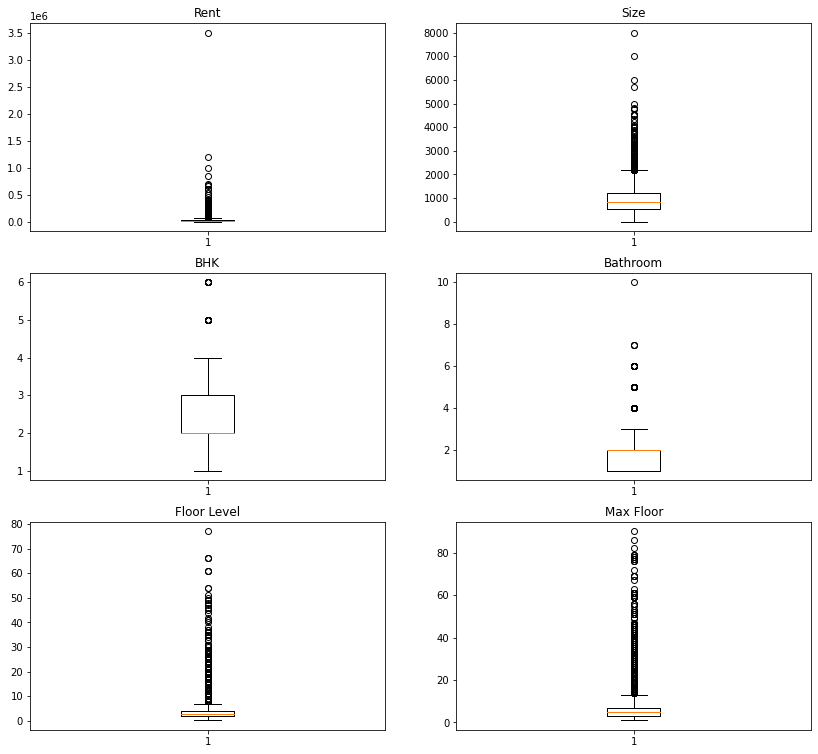

In [123]:
# Identifying outliers for Rent

def show_boxplots(df):

    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
    fig.suptitle("")
    fig.set_figheight(13)
    fig.set_figwidth(14)
        
    ax1.boxplot(df['Rent'])
    ax1.set_title("Rent")

    ax2.boxplot(df['Size'])
    ax2.set_title("Size")

    ax3.boxplot(df['BHK'])
    ax3.set_title("BHK")

    ax4.boxplot(df['Bathroom'])
    ax4.set_title("Bathroom")

    ax5.boxplot(df['Floor Level'])
    ax5.set_title("Floor Level")

    ax6.boxplot(df['Max Floor'])
    ax6.set_title("Max Floor")
    
show_boxplots(new_df)

# Heading-2: Exploratory Data Analysis

# In this section we are finding outliers by plotting subplots of each column present in the original dataset. The small circles
# present at the extreme top of the boxplot can be said as the outliers. 


,Count,Dtype,Unique,Numeric,min,25%,median,mode,mean,75%,max,skew,kurt,std
Max Floor,4102,int64,48,True,1,3.0,5.0,5,6.404681,6.0,69,3.503389,16.506485,6.256881
Floor Level,4102,float64,32,True,0.25,2.0,3.0,2.0,3.551438,4.0,49.0,3.487082,18.109536,3.590125
Rent,4102,int64,175,True,1500,9425.0,15000.0,15000,18678.017065,24000.0,67000,1.509381,1.821527,13307.53143
Bathroom,4102,int64,5,True,1,1.0,2.0,2,1.765968,2.0,6,0.485836,0.343506,0.663121
Size,4102,int64,479,True,10,500.0,800.0,600,826.936616,1100.0,1965,0.448714,-0.228177,410.823218
BHK,4102,int64,6,True,1,1.0,2.0,2,1.921502,2.0,6,0.35976,0.074232,0.708867
City,4102,object,6,False,-,-,-,-,-,-,-,-,-,-
Area Type,4102,object,3,False,-,-,-,-,-,-,-,-,-,-
Furnishing Status,4102,object,3,False,-,-,-,-,-,-,-,-,-,-
Tenant Preferred,4102,object,3,False,-,-,-,-,-,-,-,-,-,-


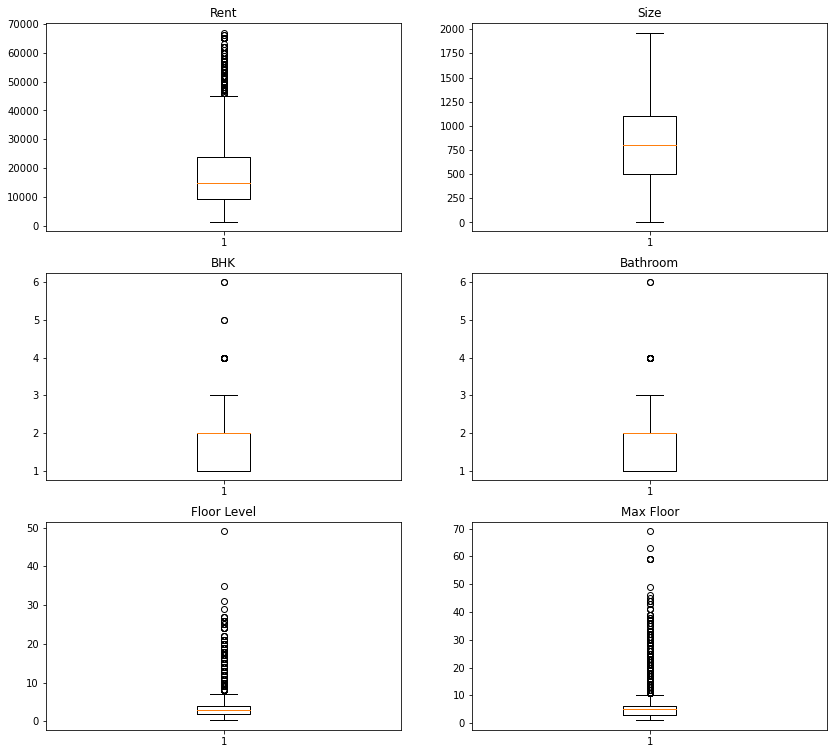

In [124]:
df1 = new_df

# Removing outliers from the columns "Rent" and "Size"
for col in ['Rent', 'Size']:
    
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    IQR = q3-q1
    lower_outliers = q1 - (1.5 * IQR) 
    higher_outliers = q3 + (1.5 * IQR) 

    df1 = df1[df1[col] < higher_outliers]
    df1 = df1[df1[col] > lower_outliers]

# Distributions after removing outliers
show_boxplots(df1)
show_stats(df1)

In [125]:
# Counting the no. of values for each unique value in "Area Type", "Point of Contact",
# and "Tenant Preferred

print(df1['Area Type'].value_counts()), 
print('\n',df1['Point of Contact'].value_counts()), 
print('\n',df1['Tenant Preferred'].value_counts()), 
print('\n',df1['Furnishing Status'].value_counts())

Super Area     2316
Carpet Area    1784
Built Area        2
Name: Area Type, dtype: int64

 Contact Owner      3094
Contact Agent      1007
Contact Builder       1
Name: Point of Contact, dtype: int64

 Bachelors/Family    3036
Bachelors            702
Family               364
Name: Tenant Preferred, dtype: int64

 Semi-Furnished    1906
Unfurnished       1696
Furnished          500
Name: Furnishing Status, dtype: int64


In [126]:
# Replacing column subtype with extremely low counts with the mode

df1['Area Type'].replace({'Built Area': 'Super Area'}, inplace=True)

df1['Point of Contact'].replace({'Contact Builder': 'Contact Owner'}, inplace=True)

print(df1['Area Type'].value_counts()), 
print('\n',df1['Point of Contact'].value_counts()), 

Super Area     2318
Carpet Area    1784
Name: Area Type, dtype: int64

 Contact Owner    3095
Contact Agent    1007
Name: Point of Contact, dtype: int64


(None,)

<AxesSubplot:xlabel='Size', ylabel='Count'>

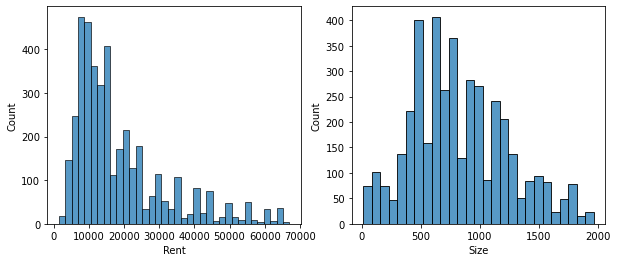

In [127]:
# Q1:  Relationship of Rent with Size
# 1-1: Distribution of Rent and Size with a culmulative distribution curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(data=df1, x="Rent", ax=ax1)
sns.histplot(data=df1, x="Size", ax=ax2)

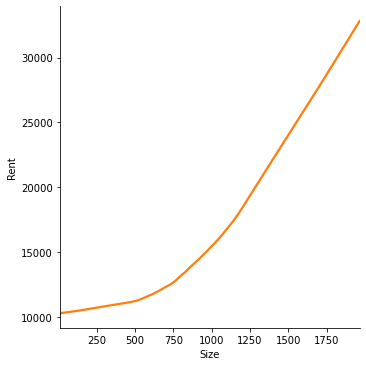

In [128]:
# 1-2: Regression graph used to show how rent varies with size

sns.lmplot(x="Size", y="Rent", data=df1,
lowess=True, scatter=False,line_kws={"color": "C1"});

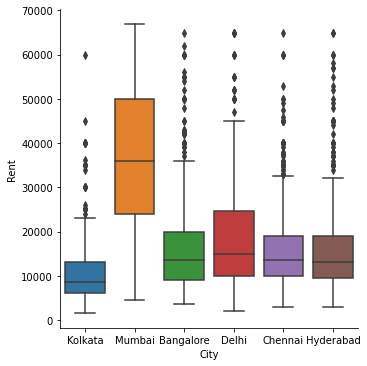

In [129]:
# Q2: Which city is the most expensive to live in? (in terms of house rent affordability)

# 2-1: Distribution of Rent accross different cities

sns.catplot(data=df1, x="City", y="Rent", kind="box")

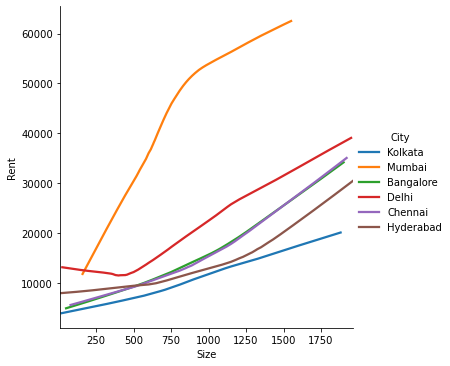

In [130]:
# 2-2: How Rent changes with the size of a house in different cities

sns.lmplot(x="Size", y="Rent", data=df1, hue="City",
           lowess=True, scatter=False);

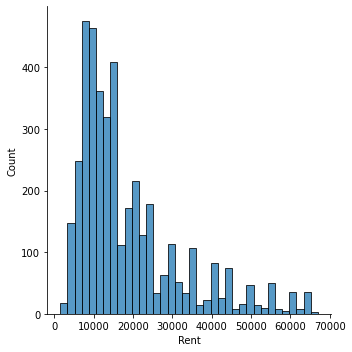

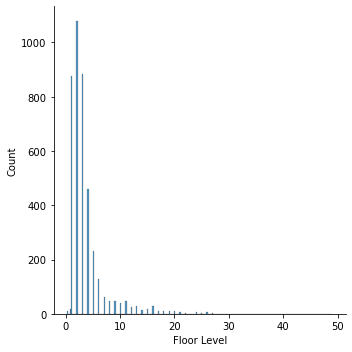

In [131]:
# Q3: Does the floor level of a house affect its rent?

# 3-1: Distribution of Rent and Floor levels in the dataset

sns.displot(data=df1, x="Rent")
sns.displot(data=df1, x="Floor Level")

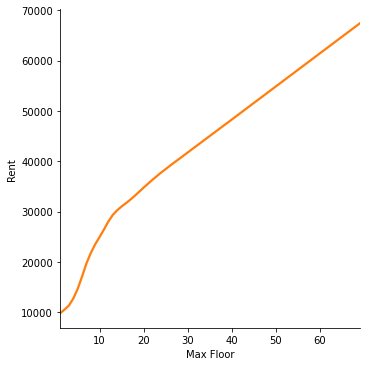

In [132]:
# 3-2: Relationship between Rent and Max Floor

sns.lmplot(x="Max Floor", y="Rent", data=df1,
           lowess=True, scatter=False, line_kws={"color": "C1"});

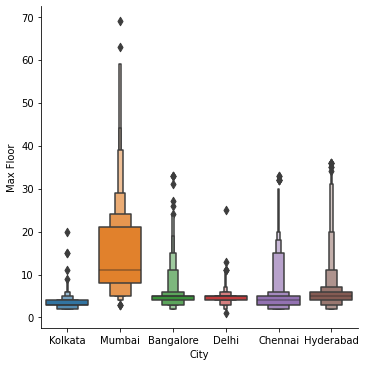

In [133]:
# Q4: How do the houses in each city compare with each other in terms of the size of the house and the number of floors?

# 4-1: Distribution of Max Floor levels accross different cities

sns.catplot(data=df1, x="City", y="Max Floor", kind="boxen")

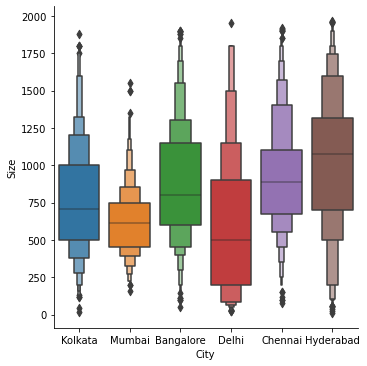

In [134]:
# 4-2: Distribution of house sizes accross different cities

sns.catplot(data=df1, x="City", y="Size", kind="boxen")

In [135]:
# Converting categorical columns into numeric data types by assigning numeric labels to string values

cols_to_replace = {'Area Type'        : {'Super Area': 1, 'Carpet Area': 2, 'Built Area': 3}, 
                   
                   'Point of Contact' : {'Contact Owner': 1, 'Contact Agent': 2, 'Contact Builder': 3}, 
                   
                   'Tenant Preferred' : {'Bachelors/Family': 1, 'Bachelors': 2, 'Family': 3},
                   
                   'Furnishing Status': {'Unfurnished': 1, 'Semi-Furnished': 2, 'Furnished': 3},
                   
                   'Area Type'        : {'Super Area': 1, 'Carpet Area': 2, 'Built Area': 3},
                   
                   'City'             : {'Kolkata': 1, 'Mumbai': 2, 'Bangalore': 3, 'Delhi': 4, 'Chennai': 5, 'Hyderabad': 6}}

df2 = df1.replace(cols_to_replace)

<AxesSubplot:>

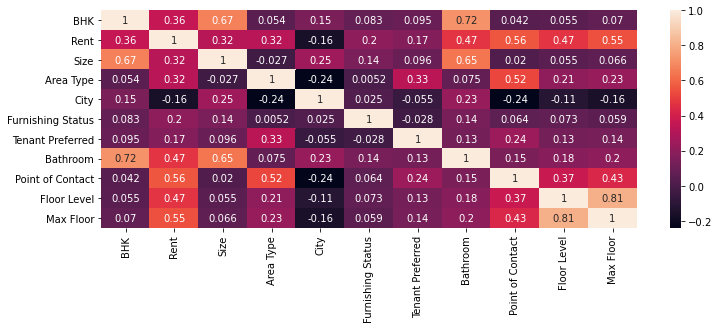

In [136]:
plt.figure(figsize=(12,4))
sns.heatmap(df2.corr(), annot = True)

In [137]:
# Scaling values using scikit learn standard scaler

ss = StandardScaler()

cols_to_scale = ['BHK', 'Rent', 'Size', 'Area Type'
                 , 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'Floor Level', 'Max Floor']
df3 = df2

df3[cols_to_scale] = ss.fit_transform(df2[cols_to_scale])
df3

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Max Floor
0,0.110751,-0.652193,0.664755,-0.877285,-1.617802,-1.055676,-0.548089,0.352968,-0.570406,-0.710769,-0.544216
1,0.110751,0.099353,-0.065575,-0.877285,-1.617802,0.434476,-0.548089,-1.155236,-0.570406,-0.432193,-0.384373
2,0.110751,-0.126111,0.421311,-0.877285,-1.617802,0.434476,-0.548089,-1.155236,-0.570406,-0.432193,-0.384373
3,0.110751,-0.652193,-0.065575,-0.877285,-1.617802,-1.055676,-0.548089,-1.155236,-0.570406,-0.432193,-0.544216
4,0.110751,-0.840079,0.056146,1.139880,-1.617802,-1.055676,1.024122,-1.155236,-0.570406,-0.432193,-0.544216
...,...,...,...,...,...,...,...,...,...,...,...
4740,0.110751,-0.501884,1.273363,-0.877285,1.363163,-1.055676,-0.548089,0.352968,-0.570406,-0.153617,-0.544216
4741,0.110751,-0.276420,0.421311,1.139880,1.363163,0.434476,-0.548089,0.352968,-0.570406,0.124958,-0.064686
4743,1.521624,1.226672,2.247137,1.139880,1.363163,0.434476,-0.548089,1.861173,1.753136,0.124958,-0.064686
4744,1.521624,1.978218,1.638528,1.139880,1.363163,0.434476,2.596333,0.352968,1.753136,5.696475,4.570777


In [138]:
# Splitting features into independent and dependent variables

X = df3[['BHK', 'Size', 'Area Type', 'Bathroom', 'City', 'Point of Contact', 'Floor Level', 'Max Floor']]
Y = df3['Rent']

In [139]:
# Splitting the cleaned dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

# Loading the gradient boost regression model for training
reg = GradientBoostingRegressor(learning_rate=0.15, random_state=42, max_depth = 5, n_estimators=60)

# Using the model to train on our training data
reg.fit(X_train, y_train)
""
# Generating predictions using the trained model on the test set
ypred = reg.predict(X_test)

# Calculating the accuracy/score of the model
reg.score(X_test,y_test)

0.7586939888636168